<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Cancer_cell_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google. colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:45<00:00, 56.0MB/s]
100% 5.20G/5.20G [00:45<00:00, 124MB/s] 


In [ ]:
import zipfile
zip_r = zipfile.ZipFile('skin-cancer-mnist-ham10000.zip')
zip_r.extractall()
zip_r.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
import pandas as pd
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
y = data['label']
x = data.drop(columns = ['label'])

(10015, 2352)

In [ ]:
def shp(value,valu):
    values = np.unique(y)

    array = tf.constant(values)

    encoded_values = tf.one_hot(values,depth=len(values))

    val = encoded_values.fit(valu)
    return val

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
x = (x-np.mean(x))/np.std(x)
print('Shape of X :',x.shape)

Shape of X : (10015, 28, 28, 3)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_flattened = np.reshape(x, (x.shape[0], -1))

X_train, X_test, Y_train, Y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (-1, x.shape[1], x.shape[2], x.shape[3]))
X_test = np.reshape(X_test, (-1, x.shape[1], x.shape[2], x.shape[3]))

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
Y_train

6582    4
7194    4
9446    4
533     2
132     2
       ..
5734    4
5191    4
5390    4
860     2
7270    4
Name: label, Length: 8012, dtype: int64

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Added dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.6))  # Added dropout layer

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))  # Added dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))  # Added dropout layer
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       147584    
                                                        

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='my_model6.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(Y_test, num_classes=7)
y_train = to_categorical(Y_train, num_classes=7)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

from tensorflow.keras.metrics import (
    SparseCategoricalAccuracy,
    SparseTopKCategoricalAccuracy,
    SparseCategoricalCrossentropy,
)
optimizer = Adam(learning_rate=0.00001)
model.compile(
    loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=['accuracy',Recall(name="recall")],
)


# Train the model using the separate training and validation sets
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=50,
    callbacks=[callback]

)

Epoch 1/50
172/251 [===================>..........] - ETA: 1:42 - loss: 0.6922 - accuracy: 0.2284 - recall: 0.0029

KeyboardInterrupt: ignored

In [ ]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(Y_test, num_classes=7)

In [ ]:
len(y_test)

2003

In [ ]:
len(X_test)

2003

<Axes: >

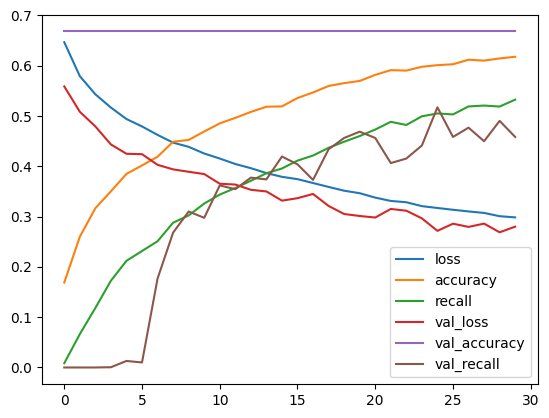

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       7168      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       147584    
                                                      

In [ ]:
len(model.predict(X_test)[0])

63/63 [==============================] - 0s 7ms/step


7